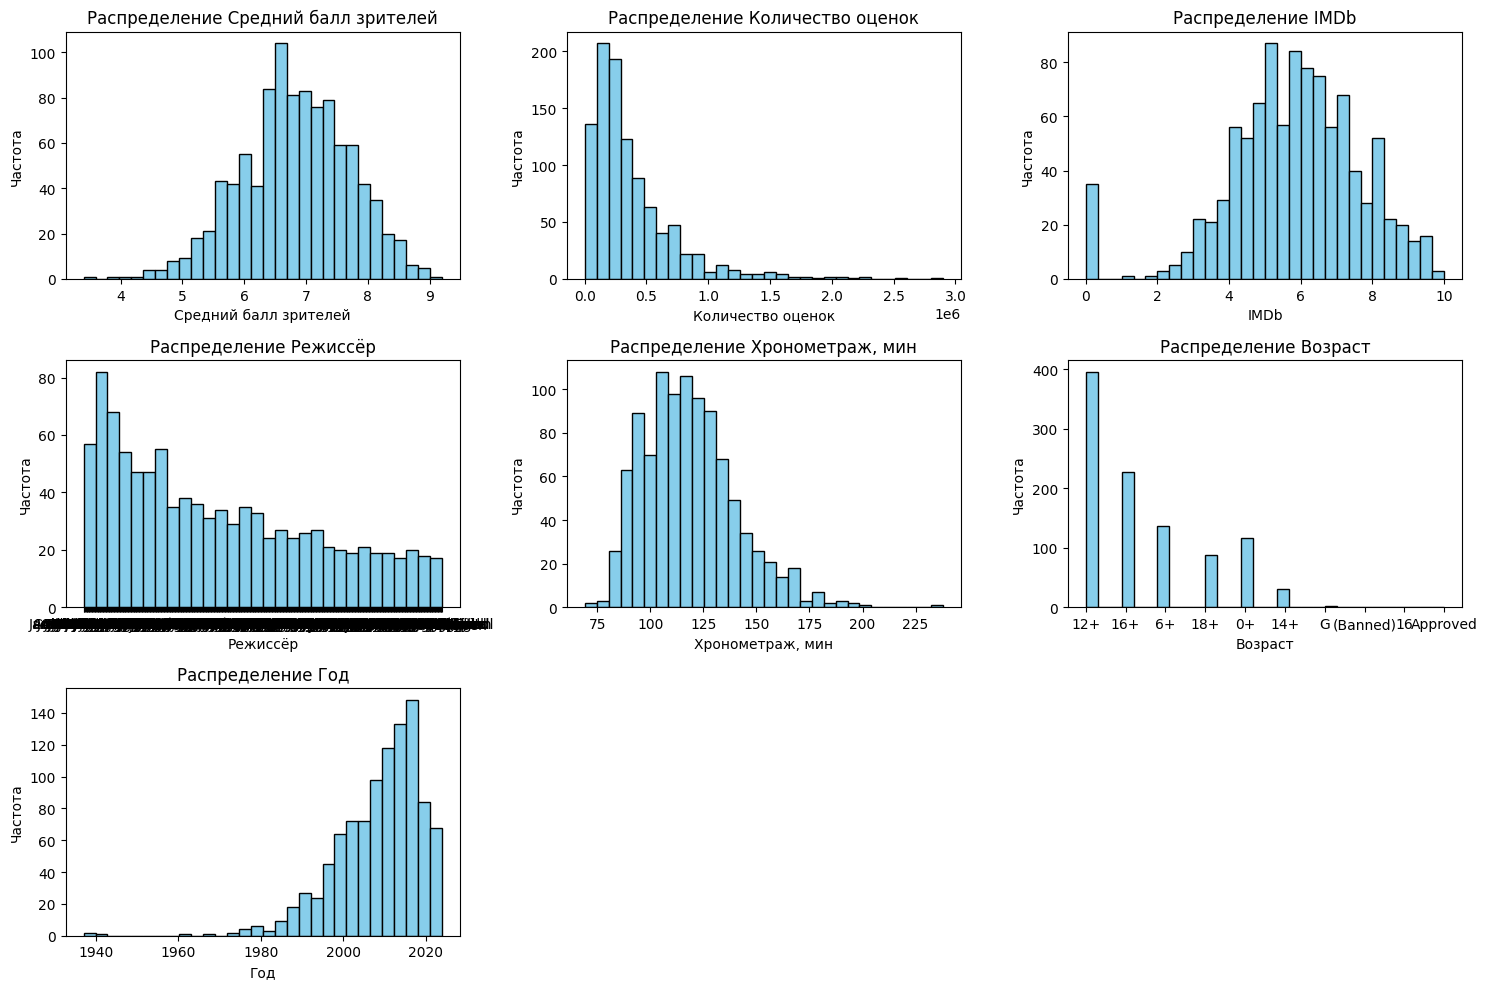

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('imdb_data.csv')

features = ['Средний балл зрителей', 'Количество оценок', 'IMDb', 'Режиссёр', 'Хронометраж, мин', 'Возраст', 'Год']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    plt.hist(data[feature], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Распределение {feature}')
    plt.xlabel(feature)
    plt.ylabel('Частота')
plt.tight_layout()
plt.show()

Графики для представления распределения данных из моего датасета

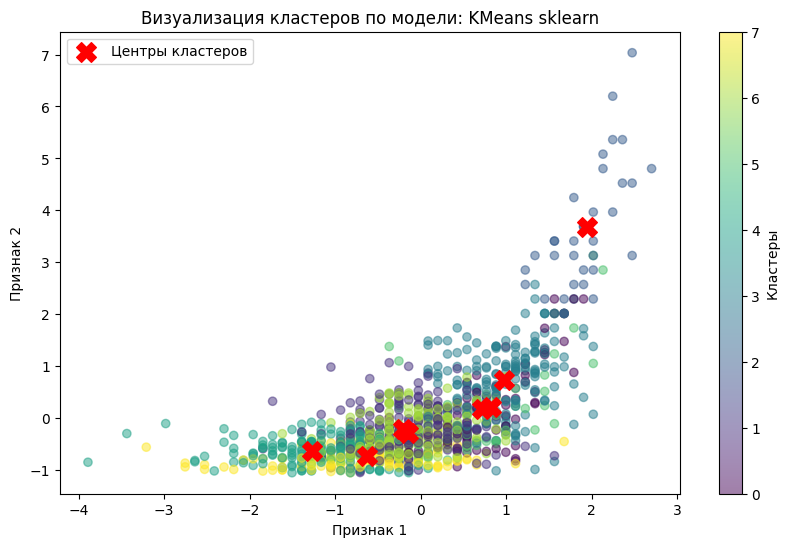

In [4]:
from modelQualityEvaluator import ModelQualityEvaluator
import pandas as pd
from baselineDecision import BaselineDecision

data = pd.read_csv('imdb_data.csv')
evaluator = ModelQualityEvaluator(data)
evaluator.preprocess_data()

baseline = BaselineDecision(evaluator.scaled_data).showBaselineDecision()

Визуализация кластеров через baseline-решение 

Лучшие параметры: {'max_iter': 300, 'n_clusters': 2}
Лучшее качество на тренировочной выборке: 0.27683392782604777
Значение Silhouette Score на валидационной выборке: 0.20583545867749883
Значение Silhouette Score на тестовой выборке: 0.2247393697278982


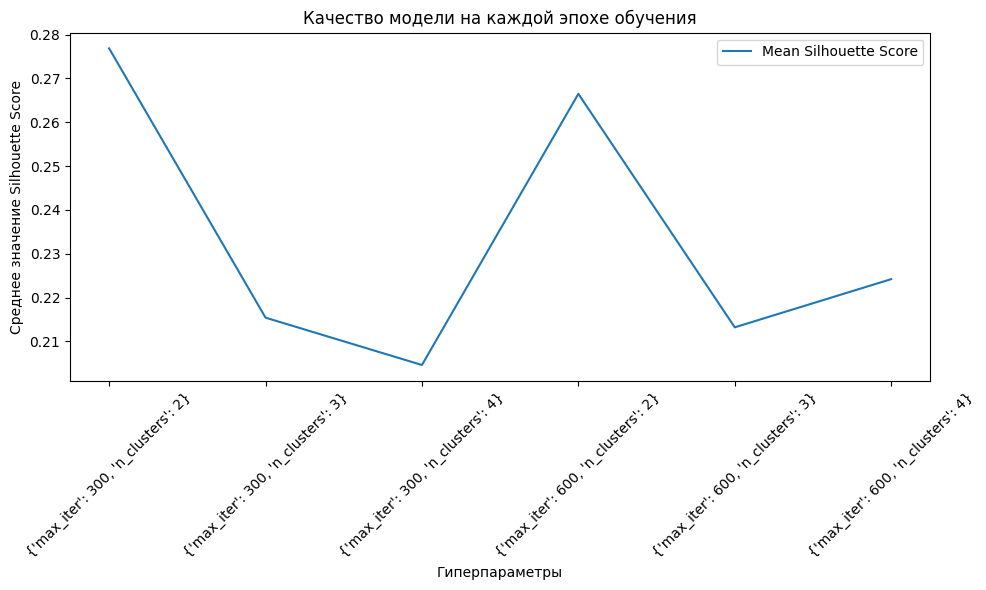

In [5]:
from modelQualityEvaluator import ModelQualityEvaluator
import pandas as pd
from sklearn.cluster import KMeans

data = pd.read_csv('imdb_data.csv')
evaluator = ModelQualityEvaluator(data)
evaluator.preprocess_data()

param_grid_my_kmeans = {
    'n_clusters': [2, 3, 4],
    'max_iter': [300, 600]
}

evaluator.evaluate_model(KMeans, param_grid_my_kmeans)

Для измерения качества модели была мною метрика Silhouette Score. В выводе представлены значения качества модели на разных выборках и лучшие гиперпараметры для модели KMeans из фреймворка. Также отображено качество модели на каждой эпохе обучения

Лучшие параметры: {'max_iter': 300, 'n_clusters': 2}
Лучшее качество на тренировочной выборке: 0.27681901251366814
Значение Silhouette Score на валидационной выборке: 0.20467433084023645
Значение Silhouette Score на тестовой выборке: 0.22566653977405962


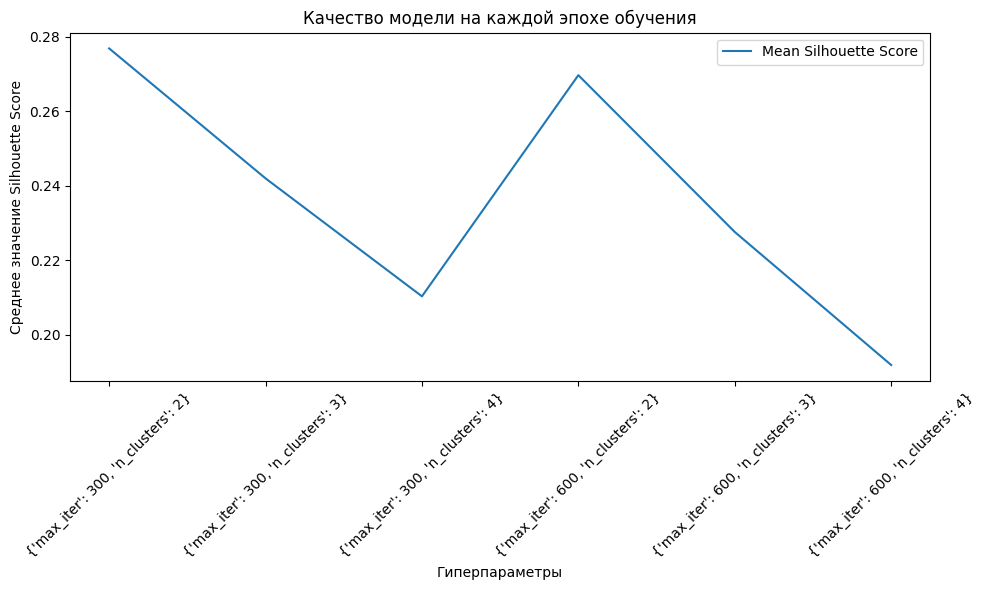

In [3]:
from modelQualityEvaluator import ModelQualityEvaluator
import pandas as pd
from myKmeans import MyKMeans

data = pd.read_csv('imdb_data.csv')
evaluator = ModelQualityEvaluator(data)
evaluator.preprocess_data()

param_grid_my_kmeans = {
    'n_clusters': [2, 3, 4],
    'max_iter': [300, 600]
}

evaluator.evaluate_model(MyKMeans, param_grid_my_kmeans)

В выводе представлены значения качества модели на разных выборках и лучшие гиперпараметры для модели KMeans собственной реализации.

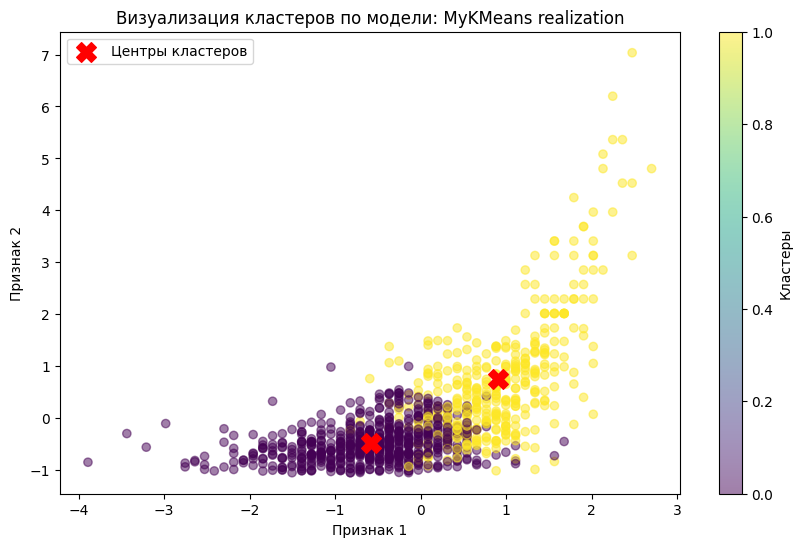

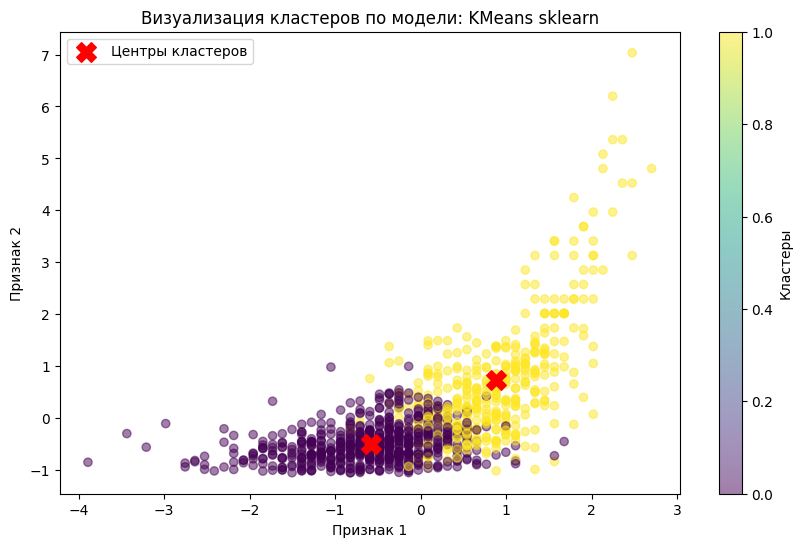

Значение Silhouette Score для KMeans из sklearn на датасете: 0.2420325729729531
Значение Silhouette Score для моей модели на датасете: 0.24445127321698837
Качество моделей похоже


In [8]:
from sklearn.cluster import KMeans
import pandas as pd
from clustersVisualizer import ClustersVisualizer
from modelQualityEvaluator import ModelQualityEvaluator
from myKmeans import MyKMeans

data = pd.read_csv('imdb_data.csv')
evaluator = ModelQualityEvaluator(data)
evaluator.preprocess_data()

model1 = MyKMeans(n_clusters=2, max_iter=300)
visualizer1 = ClustersVisualizer(model1, evaluator.scaled_data)
visualizer1.plot_clusters(feature_x=0, feature_y=1)

model2 = KMeans(n_clusters=2, max_iter=300)
visualizer2 = ClustersVisualizer(model2, evaluator.scaled_data)
visualizer2.plot_clusters(feature_x=0, feature_y=1)

evaluator.compare_models(MyKMeans, 2, 300)

В выводе представлены два графика с кластеризацией по модели из фреймворка и собственной реализацией. Также в выводе представлены результаты значений метрики качества двух моделей. Качество двух моделей схоже. 
Выводы по кластеризации в моем датасете:
По модели k-means фильмы разделены на две группы.
1)Данные кластеры имеют разную плотность. Кластер, расположенный внизу, имеет значительно большее количество точек, чем у другого, что говорит о том, что в этой области больше фильмов схожих признаками. Фильмы в этом кластере, скорее всего, имеют средний рейтинг. Это могут быть менее популярные фильмы, не получившие широкого признания критиков и зрителей. Такую же зависимость мы видим на графиках вначале, что показывают распределение данных, где фильмы с рейтингами ниже среднего преобладают. 
2)Фильмы во втором кластере, скорее всего, имеют более высокий рейтинг или отличаются по другим признакам (продолжительности, году и т.п.). Это скорее всего могут быть более достаточно популярные фильмы. Как раз на графиках распределения видно, что таких фильмов значительно меньше. Возможно, фильмы из этого кластера отличительны своим жанром или годом выпуска, что делает их более привлекательными для любителей фильмов.